###**IMPORTING NECESSARY LIBRARIES AND UPLOADING FILE**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import keras_tuner as kt

from sklearn.metrics import confusion_matrix, classification_report

In [2]:
price_data = pd.read_csv("/content/mobile_price_classification.csv")
price_data.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


###**EXPLORATORY DATA ANALYSIS**

In [3]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   2000 non-null   int64  
 1   bluetooth       2000 non-null   int64  
 2   clock_speed     2000 non-null   float64
 3   dual_sim        2000 non-null   int64  
 4   front_cam       2000 non-null   int64  
 5   4G              2000 non-null   int64  
 6   int_memory      2000 non-null   int64  
 7   m_dep           2000 non-null   float64
 8   mobile_wt       2000 non-null   int64  
 9   n_cores         2000 non-null   int64  
 10  primary_camera  2000 non-null   int64  
 11  px_height       2000 non-null   int64  
 12  px_width        2000 non-null   int64  
 13  ram             2000 non-null   int64  
 14  sc_h            2000 non-null   int64  
 15  sc_w            2000 non-null   int64  
 16  talk_time       2000 non-null   int64  
 17  three_g         2000 non-null   i

In [4]:
price_data.describe()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
#checking the values in target column

price_data['price_range'].value_counts()

,count
price_range,
1,500
2,500
3,500
0,500


In [6]:
#Check for null values

price_data.isna().sum()

,0
battery_power,0
bluetooth,0
clock_speed,0
dual_sim,0
front_cam,0
4G,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


array([[<Axes: title={'center': 'battery_power'}>,
        <Axes: title={'center': 'bluetooth'}>,
        <Axes: title={'center': 'clock_speed'}>,
        <Axes: title={'center': 'dual_sim'}>,
        <Axes: title={'center': 'front_cam'}>],
       [<Axes: title={'center': '4G'}>,
        <Axes: title={'center': 'int_memory'}>,
        <Axes: title={'center': 'm_dep'}>,
        <Axes: title={'center': 'mobile_wt'}>,
        <Axes: title={'center': 'n_cores'}>],
       [<Axes: title={'center': 'primary_camera'}>,
        <Axes: title={'center': 'px_height'}>,
        <Axes: title={'center': 'px_width'}>,
        <Axes: title={'center': 'ram'}>,
        <Axes: title={'center': 'sc_h'}>],
       [<Axes: title={'center': 'sc_w'}>,
        <Axes: title={'center': 'talk_time'}>,
        <Axes: title={'center': 'three_g'}>,
        <Axes: title={'center': 'touch_screen'}>,
        <Axes: title={'center': 'wifi'}>],
       [<Axes: title={'center': 'price_range'}>, <Axes: >, <Axes: >,
        <A

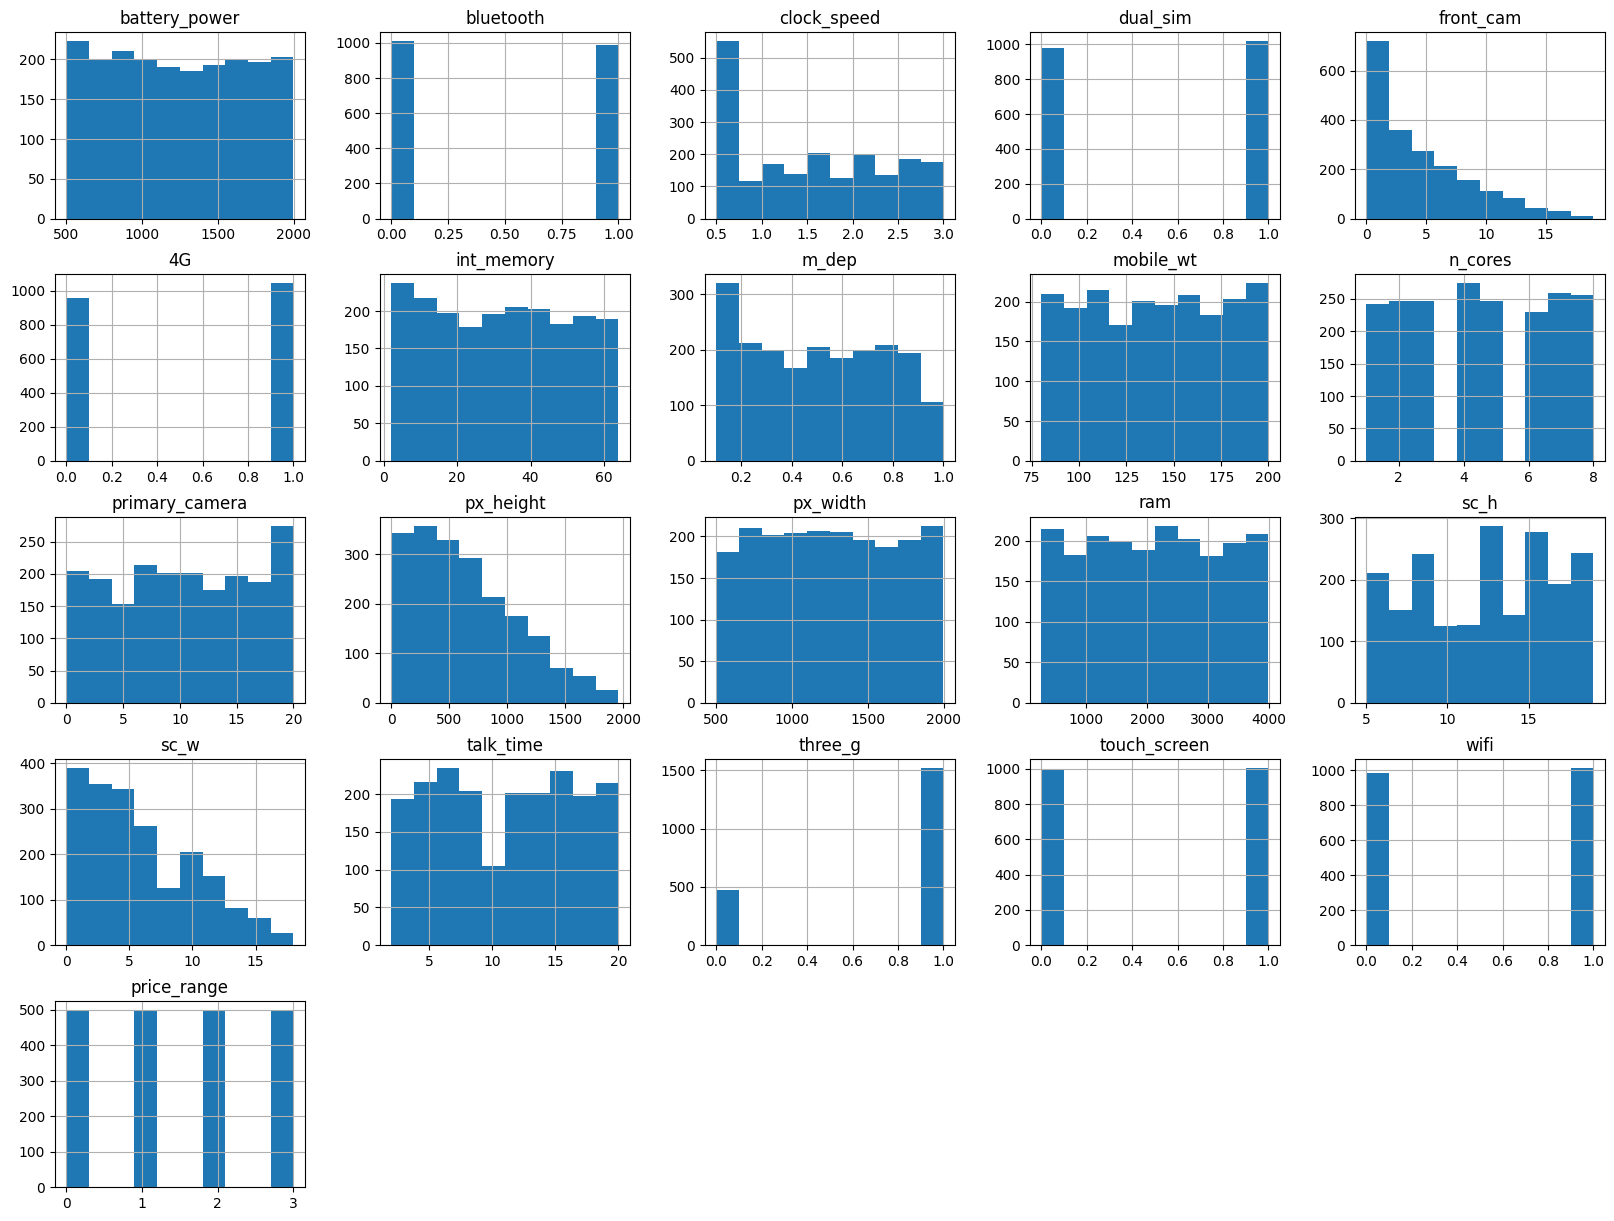

In [7]:
freq_graph = price_data.select_dtypes(include = ["int", "float"])
freq_graph.hist(figsize = (20, 15))

<ipython-input-8-ceec37702078>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="price_range", data=price_data, saturation=1, palette = "Set1")


<Axes: title={'center': 'Price Range'}, xlabel='price_range', ylabel='count'>

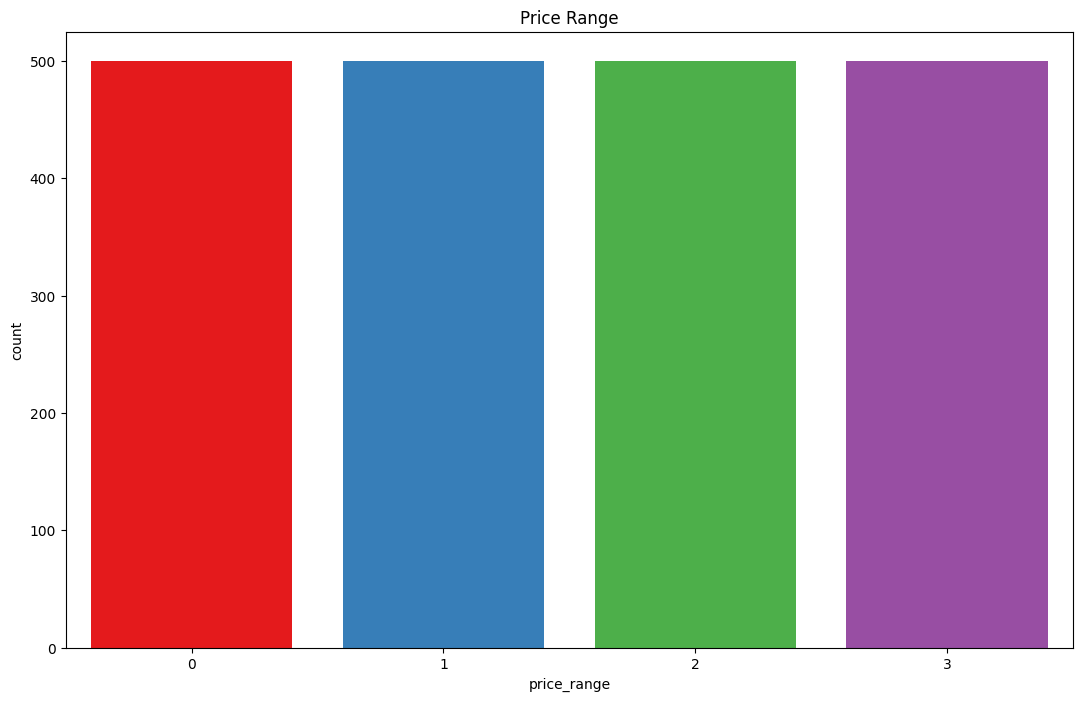

In [8]:
#Plotting the target price range values

plt.figure(figsize=(13,8))
plt.title("Price Range")
sns.countplot(x="price_range", data=price_data, saturation=1, palette = "Set1")

###**OUTLIER DETECTION**

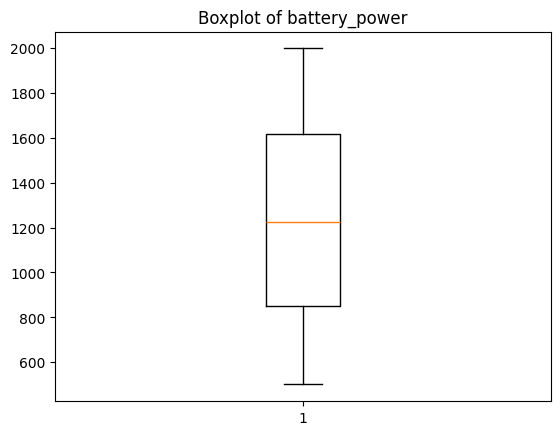

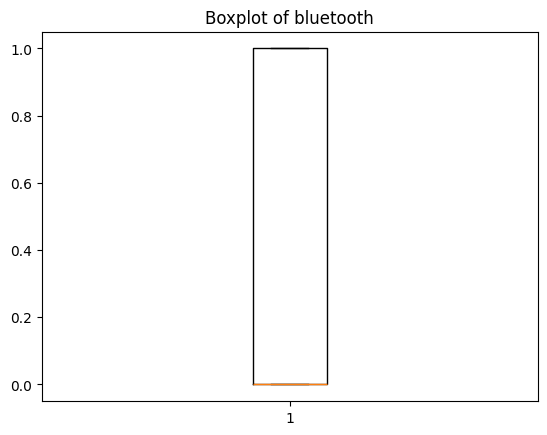

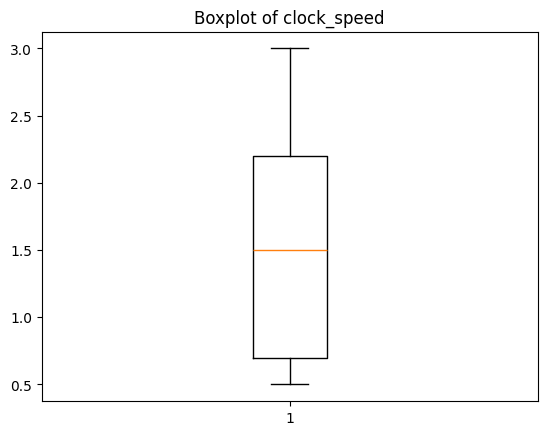

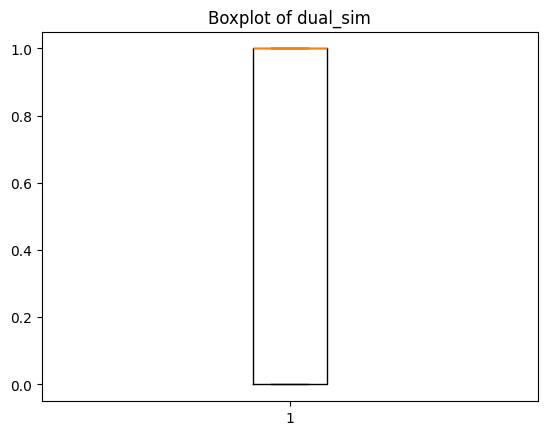

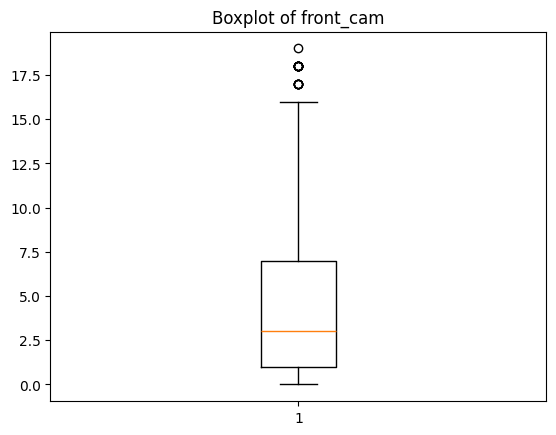

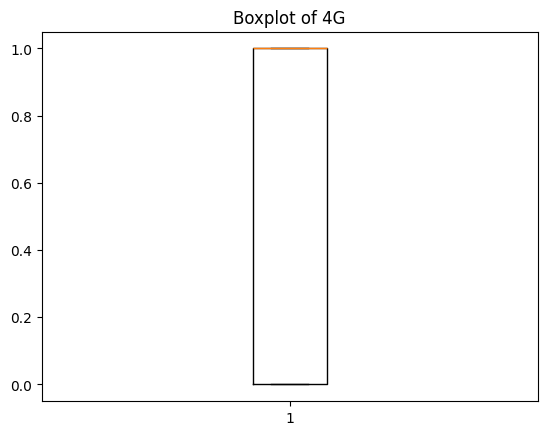

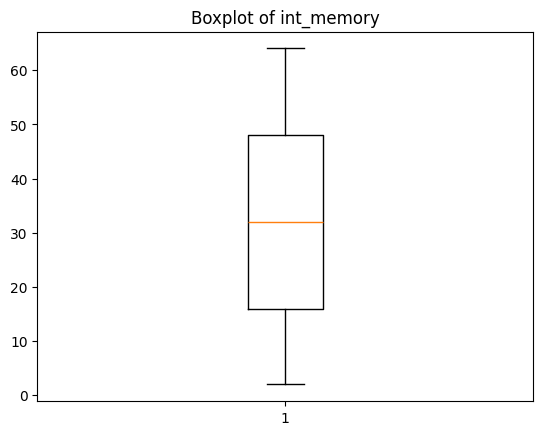

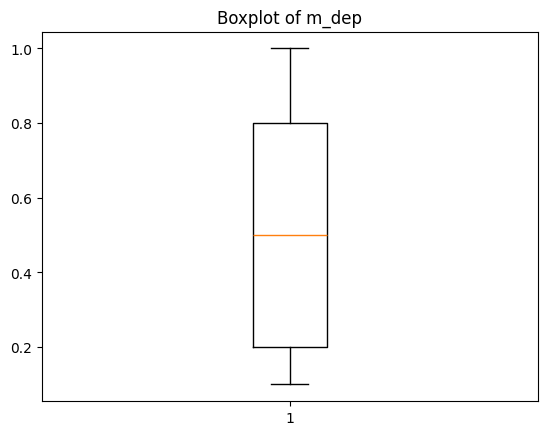

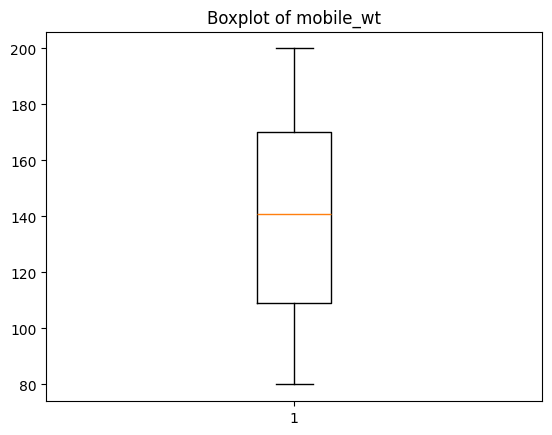

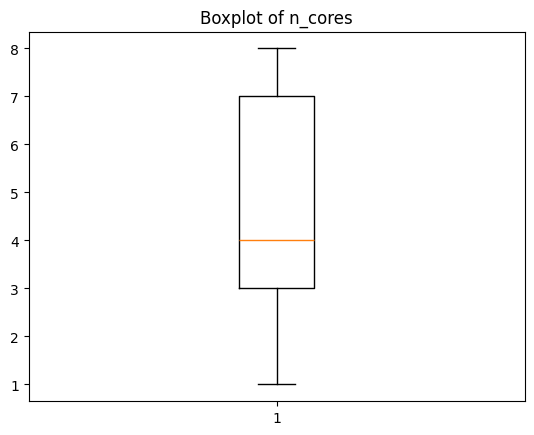

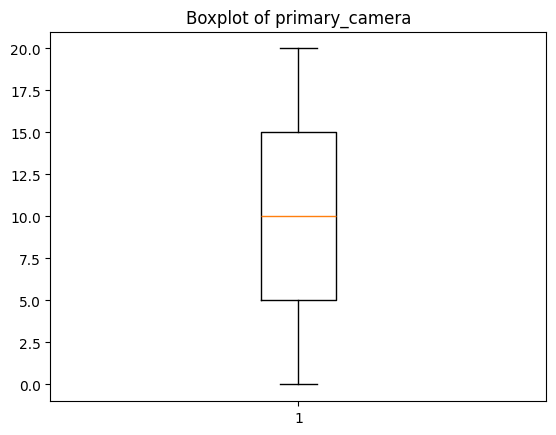

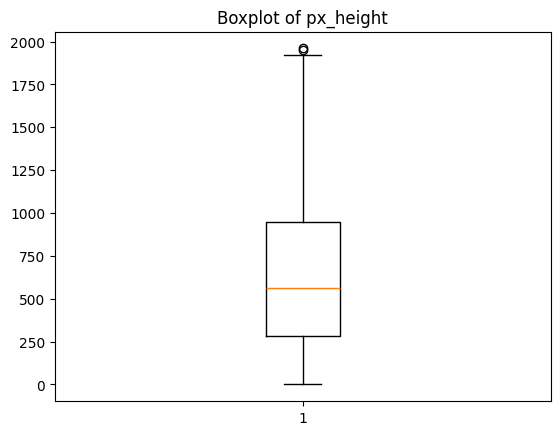

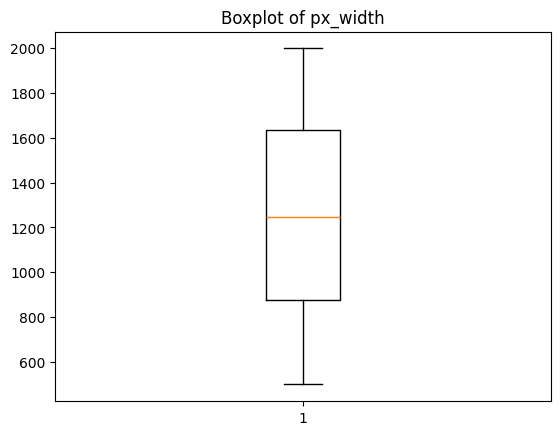

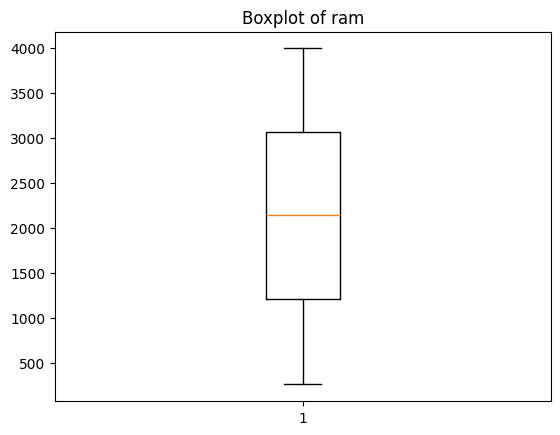

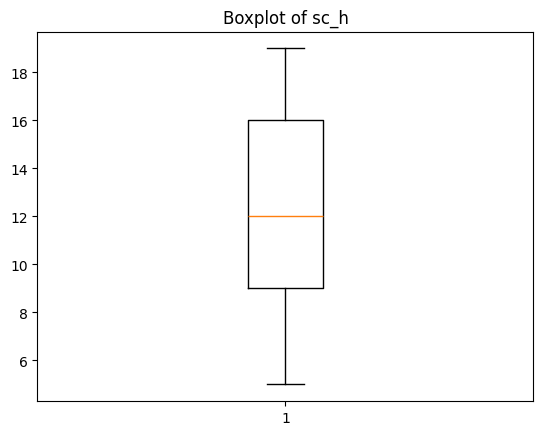

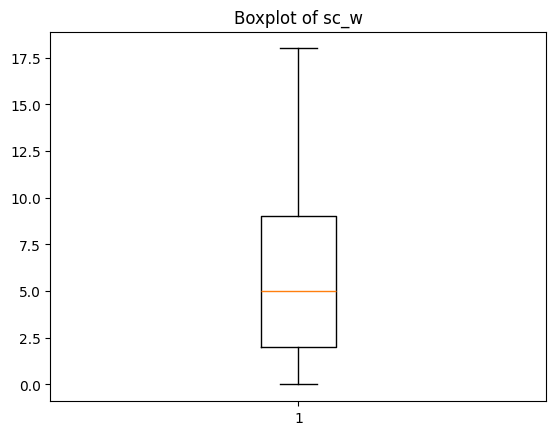

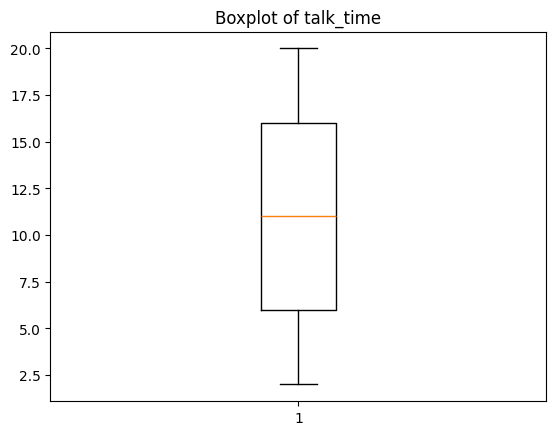

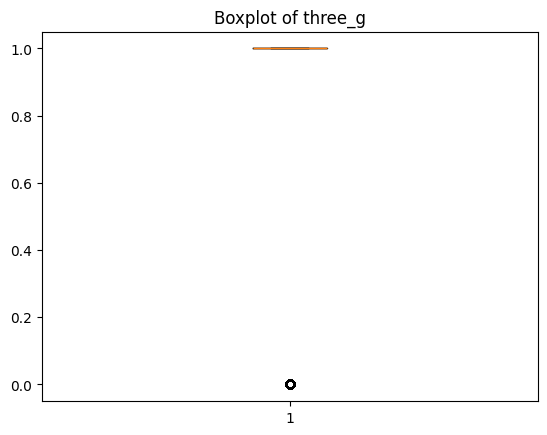

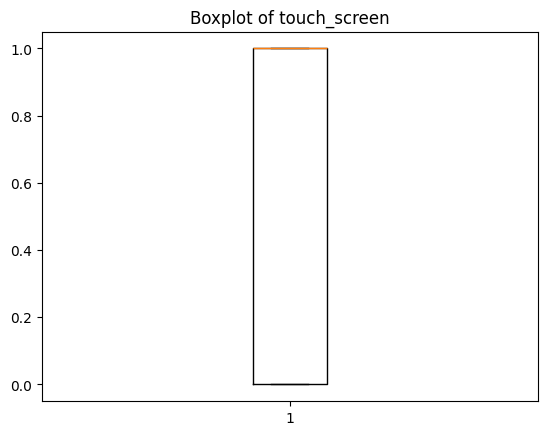

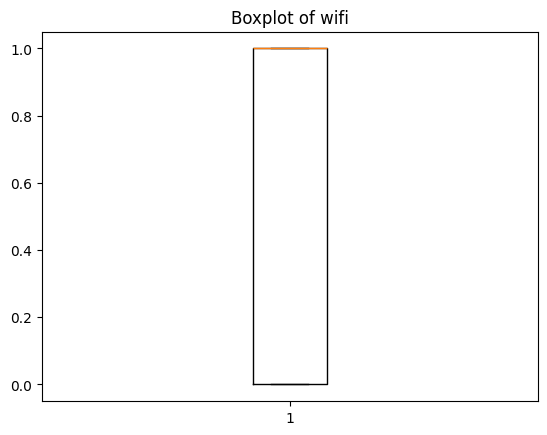

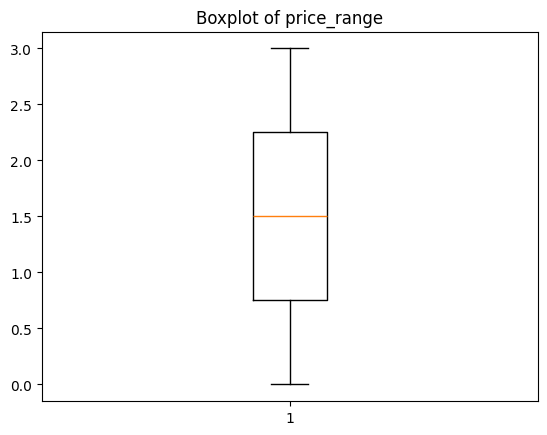

In [9]:
for i in price_data.columns:
  plt.boxplot(price_data[i])
  plt.title("Boxplot of {}".format(i))
  plt.show()

There are no outliers in the data.

###**FEATURE SCALING AND SPLITTING TRAIN TEST DATA**

Before splitting the data we have to analyse that there are 4 classes in the price range column but the dimension is set to 1 only therefore the labels should be converted to 4 instead of 1.

In [10]:
x = price_data.drop("price_range", axis = 1)
#Converting single dimension to 4
from tensorflow.keras.utils import to_categorical
num_classes = 4
y = to_categorical(price_data["price_range"], num_classes=num_classes)
print(y.shape)
#y = price_data["price_range"]


#Splitting data into training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

(2000, 4)


In [11]:
# Scaling the dataset, so eveything comes into a specific range
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

###**ANN IMPLEMENTATION**

In [12]:
pip install tensorflow keras-tuner

In [13]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout

We are building a model with an input layer, 5 hidden layer and an output layer

In [14]:
#Building the ANN model

def ann_model():
  model = Sequential()

  #Setting up the first hidden layer
  model.add(Dense(units = 64, activation='relu', input_shape = (x_train.shape[1],)))

  #Setting 5 hidden layers in btw
  model.add(Dense(units = 64, activation='relu'))
  model.add(Dense(units = 32, activation='relu'))
  model.add(Dense(units = 16, activation='relu'))
  model.add(Dense(units = 8, activation='relu'))
  model.add(Dense(units = 4, activation='relu'))


  #Output layer : 4 indicates the number of labels we have,
  #for multiclass we use softmax activation function
  model.add(Dense(4,activation='softmax'))

  model.compile(
      optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
      loss = 'categorical_crossentropy',
      metrics = ['accuracy']
    )
  return model

In [15]:
#Final ANN model, compiling it with adam optimizer

model = ann_model()
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


###**TRAINING AND EVALUATING THE MODEL**

In [16]:
## Training the model

model.fit(x_train, y_train, epochs = 100, batch_size = 10, verbose = 1)

##number of epochs given is 100 , splitting value is 20% and verbose set to 1 so as to see the completion of each

Epoch 1/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2648 - loss: 1.3594
Epoch 2/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6415 - loss: 0.8173
Epoch 3/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7458 - loss: 0.5301
Epoch 4/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9159 - loss: 0.2259
Epoch 5/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9421 - loss: 0.1465
Epoch 6/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9620 - loss: 0.1074
Epoch 7/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9780 - loss: 0.0666
Epoch 8/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9689 - loss: 0.0726
Epoch 9/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9773 - loss: 0.0622
Epoch 10/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9626 - loss: 0.0805
Epoch 11/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9967 - loss: 0.0201
Epoch 12/100
160/160 ━━━━━━━━━━━━━━━━━━━━

In [17]:
#EVALUATING THE MODEL

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test Accuracy of the model: {test_accuracy * 100:.2f}%')

# Predicting the Test set results
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Obtaining the score and accuracy for the model

score, acc = model.evaluate(x_test, y_test)
print('\nTraining score of the model:', score)
print('\nTraining accuracy of the model:', acc)

Test Accuracy of the model: 90.00%
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8751 - loss: 0.8475 

Training score of the model: 0.7437667846679688

Training accuracy of the model: 0.8999999761581421


While evaluating we found that the test accuracy and train accuracy is 94% which is a good.

But the score is 0.3.



###**MODEL SUMMARY**

In [18]:
##Confusion metric

y_test_arg=np.argmax(y_test,axis=1)
y_pred_cm = np.argmax(model.predict(x_test),axis=1)
cm = confusion_matrix(y_test_arg,y_pred_cm)
print('Confusion Matrix', cm)

#Classification Report
print('Classification Report')
target_names = ['Class {}'.format(i) for i in range(4)]
print(classification_report(y_test_arg, y_pred_classes, target_names=target_names))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Confusion Matrix [[95  5  0  0]
 [10 85  5  0]
 [ 0  3 86 11]
 [ 0  0  6 94]]
Classification Report
              precision    recall  f1-score   support

     Class 0       0.90      0.95      0.93       100
     Class 1       0.91      0.85      0.88       100
     Class 2       0.89      0.86      0.87       100
     Class 3       0.90      0.94      0.92       100

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



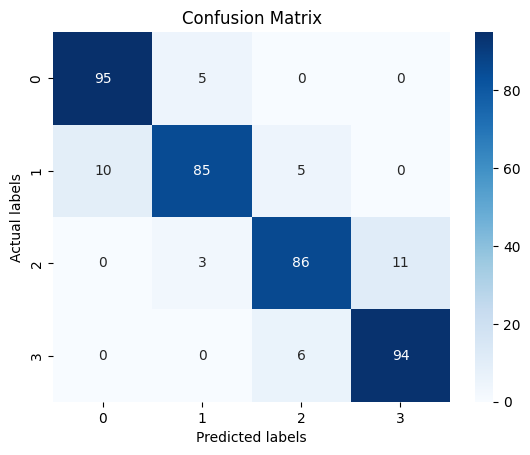

In [19]:
# Plotting Correlation Matrix

corr = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.show()

In [20]:
# Summary of model

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4)                   │              20 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,914 (97.32 KB)

 Trainable params: 8,304 (32.44 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,610 (64.89 KB)

###**Kfold CROSS VALIDATION**

In [21]:
!pip install scikeras

In [22]:
#K fold validation

from scikeras.wrappers import KerasClassifier
classifier = KerasClassifier(model = ann_model,batch_size=20, epochs=32, verbose=0)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10, n_jobs = -1)

In [23]:
# Calculate mean and variance

mean_kfold = accuracies.mean()
variance_kfold = accuracies.std()

print(" Accuracy_Mean:", mean_kfold)
print(" Accuracy_Variance:", variance_kfold)

 Accuracy_Mean: 0.9118749999999999
 Accuracy_Variance: 0.02411722672696843


###**HYPERPARAMETER TUNING**

In [24]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

In [25]:
# Define a function to build the ANN model with dropout and regularization tuning

def build_model(hp):
    model = Sequential()

    # First hidden layer with L2 regularization and dropout
    model.add(Dense(
        units=hp.Int('units', min_value=32, max_value=128, step=32),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_regularizer', min_value=1e-5, max_value=1e-2, sampling='log')),
    ))
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))

    # Output layer with 4 labels
    model.add(Dense(4, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [29]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='keras_tuner',
    project_name='tune_dropout_regularization'
)

Reloading Tuner from keras_tuner/tune_dropout_regularization/tuner0.json


In [30]:
tuner.search(
    x_train, y_train,
    epochs=20,
    validation_split=0.2,
    verbose=1
)

In [31]:
# Identifying best hyperparameters

best_hps = tuner.get_best_hyperparameters(1)[0]
print('Units in 1st layer',best_hps.get('units'))
print('L2 Regularizer :',best_hps.get('l2_regularizer'))
print("Dropout rate :", best_hps.get('dropout_rate'))

Units in 1st layer 96
L2 Regularizer : 0.00023995130011484017
Dropout rate : 0.4
